## 3.4. Populasyon, Orneklem ve Ilgili Teoremler

### 3.4.1. Populasyon ve Orneklem - Population and Sampling

In [1]:
# Genellikle bütün popülasyonun üyeleri hakkında bilgi almak hem zordur. Bunun yerine popülasyondan rastgele 
# bir alt küme alabiliriz. İşte bu alt kümeye örneklem diyoruz.Veri bilimcisi olarak siz de projelerinizde örneklem 
# verilerini alacak, verinin karmaşıklığını azaltacak ve anlaşılabilir hale getireceksiniz. Böylece örneklem 
# yöntemini kullanarak bu veri ile analiz ve modellemeler yapacaksınız.

In [2]:
# Python ile örneklem almak için Numpy kütüphanesinde ki random modülünde yer alan choice fonksiyonunu kullanabiliriz.
# Bunun için öncelikle bir popülasyuna ihtiyacımız olacak. Biz şimdilik popülasyonu da kendimiz oluşturalım. 
# Bunun için ise aynı modülün içinden normal fonksiyonunu kullanarak ortalaması 10 ve standart sapması 0.2 olan 10000 
# sayıdan oluşan bir popülasyon oluşturalım ve içinden 500 elemanlık bir örneklem seçelim.

In [3]:
import numpy  as np

populasyon = np.random.normal(10,0.2,10000)
orneklem = np.random.choice(populasyon,500)

In [9]:
# Şimdi de örnek olarak popülasyon ve örneklemde yer alan 10.2 den büyük sayıların oranına bakalım:

print('Populasyon icin oran:',len(populasyon[populasyon>10.2])/len(populasyon)*100)
print('Orneklem icin oran:',len(orneklem[orneklem>10.2])/len(orneklem)*100)

Populasyon icin oran: 15.6
Orneklem icin oran: 18.6


In [10]:
# Oranlar eşit olmasa da birbirine yakın. Orneklemimiz belirli bir hata payıyla popülasyon hakkkında bilgi verdi.

### 3.4.2. Merkezi Limit Teoremi - Central Limit Theorem

In [11]:
# Merkezi Limit Teoremi, normal dağılımın önemini gösteren bir teoremdir. 
# Buna göre, örneklem sayısı arttıkça, örneklem dağılımınin ortalaması aynı popülasyon ortalamasına yaklaşmaktadır. 
# Merkezi Limit Teoremi, belirli bir popülasyondan tekrar tekrar alınan örneklem ortalamasının dağılımının şeklinin 
# tam olarak ne olacağı ile ilgilidir. Spesifik olarak, örneklem büyüklükleri arttıkça, tekrarlanan örneklemin 
# ortalamasının dağılımı normal dağılıma yaklaşacaktır.

#### 3.4.2.1. Merkezi limit teoreminin sartlari

In [12]:
# Merkezi Limit Teoreminin geçerli olması için bazı şartların yerine getirilmesi gerekmektedir. 
# Bunlar, örneklemlerin birbirinden bağımsız olması ve eş bir dağılıma sahip olmasıdır 
# (Independent and identically distributed). Merkezi limit teoremi popülasyonun dağılımına ilişkin herhangi 
# bir ek varsayımda bulunmamaktadır. 
# Zar örneği üzerinden düşünecek olursak bir zar atışının önceki atıştan bağımsız ve her atışta çıkabilecek sayıların 
# çıkma olasılığı aynı olması şartları sağlamaktadır.

<IPython.core.display.Javascript object>


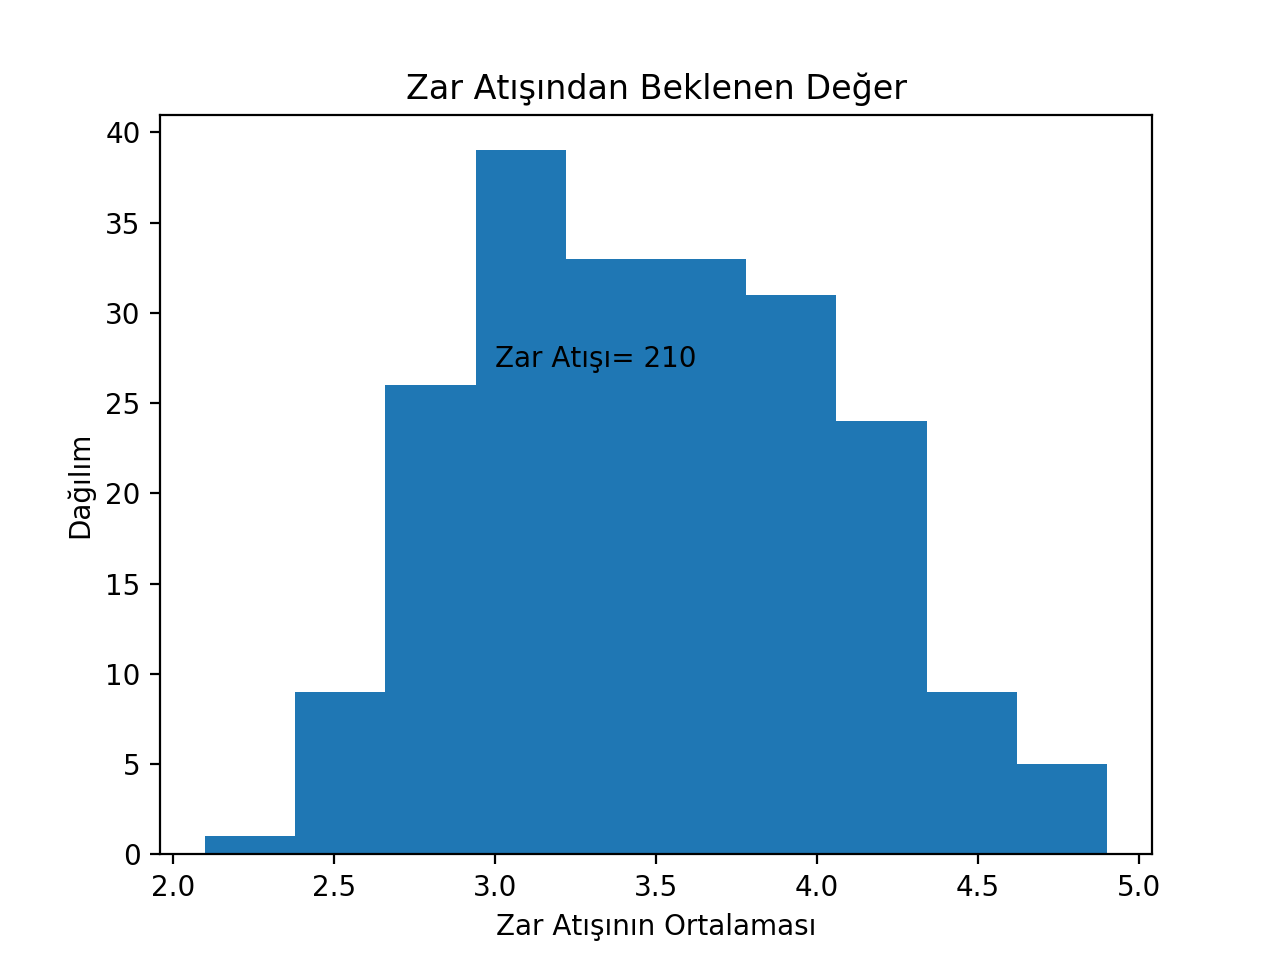

In [15]:
# Şimdi, örneklem sayısı değiştiğinde dağılımının nasıl değiştiğini ve örneklem sayısı arttıkça, örneklem 
# ortalamasının dağılımının normal dağılıma nasıl yaklaştığını gösterecek bir kod yazalım.

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook

# 1000 kere zar atalim
n = 1000

ortalama =[]
for i in range (1,n):
    a = np.random.randint(1,7,10) #randint() returns an integer number selected element from the specified range
    ortalama.append(np.average(a))
    
# 10 örneklem seçimi
ortalama[1:10]

def clt(current):
    plt.cla()
    if current == 1000: 
        a.event_source.stop()

    plt.hist(ortalama[0:current])

    plt.gca().set_title('Zar Atışından Beklenen Değer')
    plt.gca().set_xlabel('Zar Atışının Ortalaması')
    plt.gca().set_ylabel('Dağılım')

    plt.annotate('Zar Atışı= {}'.format(current), [3,27])
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, clt, interval=1)


#### 3.4.2.2. Orneklemdeki gruplarin karsilastirilmasi - Comparing the groups in samples

In [1]:
# Iki popülasyondan alınan iki örneklemin ortalamalarını  karşılaştırabiliriz. 
# İki ortalamayı karşılaştırmak için, öncelikle her örneklemin ortalama ve standart sapmasını hesaplayalım. 
# Sonra, ortalamanın birinden diğerini çıkarır ve iki örneğin birleştirilmiş varyans bağlamındaki farkına bakarız. 
# Fark varyansa göre büyükse, az ihtimalle rastlantısal şansa bağlıdır. 
# Ancak büyük olasılıkla iki popülasyon arasındaki anlamlı farklılıkları yansıtmaktadır.
# DEFTERDE

# P değeri ne kadar düşükse, o kadar emin bir şekilde popülasyondaki iki grubun ortalamaları arasında anlamlı 
# bir fark olduğu sonucuna varabiliriz.

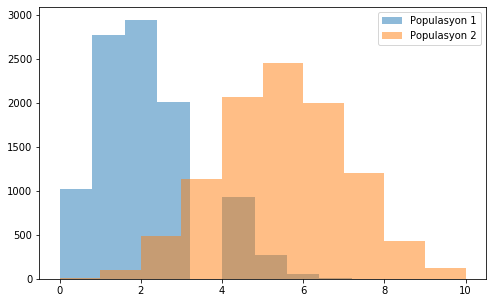

In [60]:
# Şimdi bazı popülasyon verileri ile bir deneme yapalım. 
# İki farklı popülasyonu temsil etmek için iki değişken belirleyelim.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(8,5))

pop1 = np.random.binomial(10,0.2,10000)
pop2 = np.random.binomial(10,0.5,10000)

plt.hist(pop1, alpha=0.5, label='Populasyon 1')
plt.hist(pop2, alpha=0.5, label='Populasyon 2')
plt.legend(loc='upper right')
plt.show()

In [61]:
# populasyonlar normal dagilimli degiller.
# Simdi her populasyondan 100'er orneklem alalim ve onlarin histogramini cizelim.

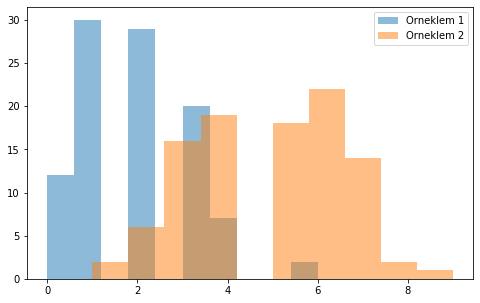

In [62]:
plt.figure(figsize=(8,5))
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
plt.hist(sample1,alpha=0.5, label='Orneklem 1')
plt.hist(sample2,alpha=0.5, label='Orneklem 2')
plt.legend(loc='upper right')
plt.show()

In [63]:
print('1. Orneklemin ortalamasi:', sample1.mean())
print('2. Orneklemin ortalamasi:', sample2.mean())
print('1. Orneklemin standart sapmasi:', sample1.std())
print('2. Orneklemin standart sapmasi:', sample2.std())

1. Orneklemin ortalamasi: 1.88
2. Orneklemin ortalamasi: 4.83
1. Orneklemin standart sapmasi: 1.2512393855693642
2. Orneklemin standart sapmasi: 1.667663035508073


In [64]:
# simdi orneklem ortalamalarinin farklarini alalim

fark = sample2.mean()-sample1.mean()
print(fark)

2.95


In [65]:
# örneklem dağılımlarinin standart hatasını hesaplayalım. 
# İlk olarak, her bir değişkenin boyutunu ve standart sapmasını içeren birer dizi oluşturalım. 
# Örneklemlerin boyutlarını biliyoruz, ancak onları yine de hesaplayalım.

boyut = np.array([len(sample1),len(sample2)])
std_sapma = np.array([sample1.std(),sample2.std()])
fark_se = (sum(std_sapma**2/boyut))**0.5
fark_se

0.2084874096918085

In [66]:
# t-value

print(fark/fark_se)

14.149535477277821


In [67]:
# Şimdi bu değeri farklı bir yöntemle daha hesaplayalım. 
# Bu kez, “istatistik” olarak da adlandırılan t-değerini ve “p-değeri” olarak adlandırılırılan olasılığı 
# scipy kütüphanesindeki stats modülünde yer alan ttest_ind fonksiyonunu kullanarak hesaplayacağız. 
# Bizim hesapladığımız t-değeri ile fonksiyonun hesapladığı t-değeri birbirinden biraz farklı 
# (1/100 hassasiyetle) olabilir. İki hesaplama arasındaki bu küçük farklılık çoklu adım yaklaşımımızın 
# (multiple step approach) neden olduğu yuvarlama farklılıklarından kaynaklandığını söyleyebiliriz.

from scipy.stats import ttest_ind
ttest_degeri = ttest_ind(sample1,sample2, equal_var=False)
print(ttest_degeri)

Ttest_indResult(statistic=-14.078610040785854, pvalue=5.223714404733424e-31)


In [68]:
# t değeri, iki grup arasındaki farkı, iki örneklemdeki varyans miktarı ile ölçeklendirir. 
# Örneklemlerdeki yüksek değişkenlik, ortalamaları çok farklı görünen gruplara öncülük edebilir. 
# Ancak histograma baktığımızda, örneklem gruplarındaki değerlerin çoğunun örtüştüğünü görürüz. 
# Gruplar, değerlerin dağılımının geniş olduğu kadar değişkenlerdir. 

# Bir t-değerini yorumlamanın bir yolu, grup ortalamalarıyla ayrılan alan kadar standart hataların sayısıdır. 
# 2'lik bir t değeri, ortalamaların birbirinden iki standart hata uzaklığında olduğunu gösterir. 
# küçük p değeri, kuvvetle muhtemel örneklemlerde gördüğümüz farklılığın popülasyonları anlamlı bir şekilde 
# yansıtmasıdır. Yukarıda yaptığınız testteki p değeri gerçekten çok küçüktür, bu yüzden, ortalamalar arasında 
# gördüğümüz farkın, örneklemdeki değişkenlikten dolayı değil, popülasyondaki gerçek bir farklılık olduğundan 
# emin olabiliriz.

### 3.4.3. Büyük Sayılar Yasası (Law of Large Numbers)

In [70]:
# Büyük Sayılar Yasası hem İstatistik\Olasılık hem de Makine Öğrenmesinde önemli bir yer tutmaktadır. 
# Bu teorem, daha fazla örnek alınarak elde edilen örneklemin popülasyonu daha iyi temsil ettiğini ortaya koymaktadır.
# Büyük sayılar yasasına göre, örneklem sayısı büyüdükçe, örneklem ortalaması popülasyonun ortalamasına yaklaşmaktadır.
# Bu yaklaşım, bize örneklem sayısının önemini anlatmaktadır. 
# Basitçe, örneklem sayısı ne kadar fazla olursa, ilgili örneklem popülasyonu o kadar iyi temsil etmektedir.

# Dolayısıyla Büyük Sayılar Yasası, kumarhanelerin neden uzun vadede para kazandığını açıklamaktadır.
# Bunu bir zar örneği üzerinde görelim. Bir zarda bildiğimiz gibi 6 adet olasılık bulunmaktadır ve 
# her bir olasılık eşittir. Bu olasılık da yaklaşık olarak 0.166'dır.
# Zarı 100 defa attığımızda ve her atış sonunda o ana kadar atılan zarların ortalamasını alırsak karşımıza 
# aşağıdakine benzer şekilde bir grafik çıkabilecektir.Attığımız ilk zar 6 geldiği için ortalamamız 6'dan 
# başlıyor ve zar attıkça popülasyon ortalamasına yaklaşıyor. 100 kez daha zar atalım. Artık ortalamamız popülasyon 
# ortalaması olan 3.5'e iyice yaklaştı. Zar atmaya devam edelim. Artık neredeyse popülasyon ortalamasına eriştik.

In [71]:
# Bu zar örneğini bir de python ile deneyelim. Örneğimizde 2000 defa zar atacağız. Zar attıkça çıkan zarı 
# örneklemimize eklerken, bir taraftan da örneklemin ortalamasını ayrı bir listeye atacağız.

orneklem = []
orneklem_ortalamalari = []
for atis_sayisi in range (1,2000):
    atis = np.random.randint(low=1, high=7, size=1)[0]
    orneklem.append(atis)
    orneklem_ortalamalari.append(np.mean(orneklem))

In [72]:
# Artık elimizde örneklem olarak 2000 tane zar sonucu ile örneklem ortalamaları içeren iki listemiz var

print(orneklem[0:10])
print(orneklem_ortalamalari[0:10])

[2, 1, 4, 1, 1, 3, 5, 6, 3, 6]
[2.0, 1.5, 2.3333333333333335, 2.0, 1.8, 2.0, 2.4285714285714284, 2.875, 2.888888888888889, 3.2]


In [73]:
# Şimdi örneklem ortalamasının grafiğini çizelim.Değişik sayılarda grafik oluşturacağımızdan için bir fonksiyon 
# yazmamız kullanım açısından işimizi kolaylaştıracaktır.

def orneklem_plotla(orneklem_ortalamasi, orneklem_sayisi, subplot_no):
    baslik_font={'family':'arial','color':'darkred', 'weight':'bold','size':13}
    eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
    plt.subplot(subplot_no)
    plt.hlines(3.5,0,orneklem_sayisi,colors='r')
    plt.plot(orneklem_ortalamasi[0:orneklem_sayisi])
    plt.ylim((1,6))
    plt.title('Orneklem Sayisi = {}'.format(orneklem_sayisi),fontdict=baslik_font)
    plt.xlabel('Orneklem Sayisi', fontdict=eksen_font)
    plt.ylabel('Orneklem Ortalamasi', fontdict=eksen_font)
    return plt

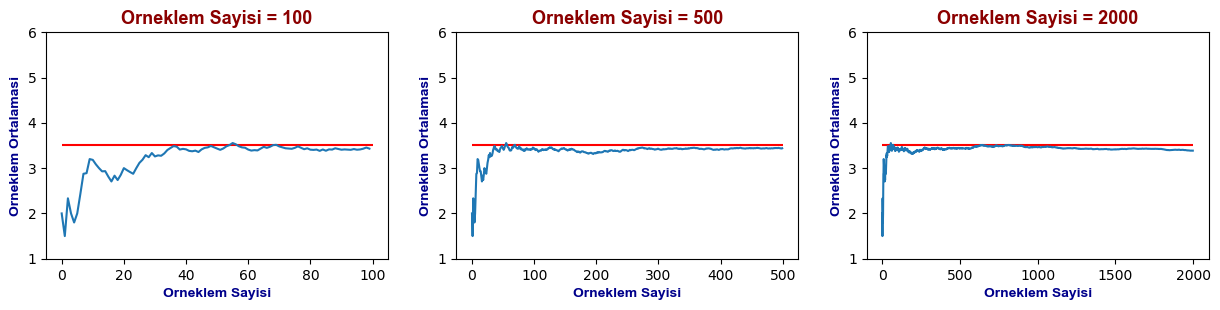

In [74]:
plt.figure(figsize=(15,3),dpi=100)
orneklem_plotla(orneklem_ortalamalari,100,131) # 131 --> 1 satır ve 3 sütunluk subplot, 1.subplot
orneklem_plotla(orneklem_ortalamalari,500,132)
orneklem_plotla(orneklem_ortalamalari,2000,133)
plt.show()

In [75]:
# Beklenen değer 3.5'tir ve grafikten görebileceğiniz gibi, örneklem sayısı küçük olduğunda, 
# ortalama 3.5'e yakın değildir ancak örneklem sayısı arttıkça, ortalama 3.5'e yaklaşmaktadır.

### Odev

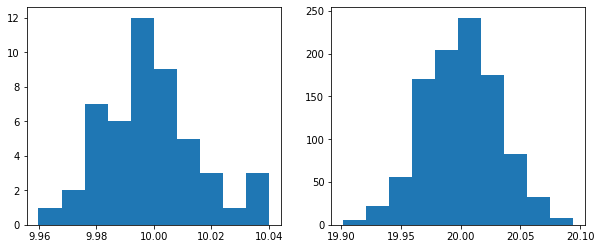

In [79]:
# Bu soruda, merkezi limit teoreminin çalışıp çalışmadığını test edeceksiniz. 
# İki adet normal dağılıma sahip 1000 gözlem içeren değişken üreteceksiniz. 
# Bu değişkenlerin, ortalama ve standart sapmasını kendiniz belirleyebilirsiniz. 
# Yapmanız gereken, ilk değişkeni 50 kere üretin ve her seferinde bu değişkenin ortalamasını alın. 
# İkinci değişkeni ise 1000 kere üretin ve yine her seferinde bu değişkenin ortalamasını alın. 
# Daha sonra, iki değişkenin hesapladığınız ortalamalarının histogramını çizdirin. 
# Hangi değişkenin ortalamalarının dağılımı normal dağılıma daha yakın? 
# Sizce Merkezi Limit Theoremi çalışmış görünüyor mu?

n1 = 50
ortalama1 = []
for i in range(1,n1):
    a1 = np.random.normal(10,0.5,1000)
    ortalama1.append(np.average(a1))

n2 = 1000
ortalama2 = []
for i in range(1,n2):
    a2 = np.random.normal(20,1,1000)
    ortalama2.append(np.average(a2))


plt.figure(figsize=(10,4))
plt.subplot (121)
plt.hist(ortalama1, label='Degisken 1')
plt.subplot (122)
plt.hist(ortalama2, label='Degisken 2')
plt.show()

# 2. degiskenin (yani orneklem sayisi daha fazla olan) dagilimi normal dagilima daha yakin.

In [ ]:
# İki madeni paramızın olduğunu varsayalım. 
# Bunlardan bir tanesi adil (yani, yeteri kadar deneme yapıldığında yazı veya tura 1/2 olasılığına yaklaşmakta), 
# diğeri ise adil değil ve atıldığında 3/4 olasılığında tura elde edilmektedir. 
# Herhangi biri seçilip, n kere deneme yapıldığında, Büyük Sayılar Yasası uzun vadede gelecek tura sayısını 
# tahmin etmemize izin verir mi? Çok sayıda deneme yapıldığında, hangi paranın seçildiğini bilebilir miyiz?
